In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

#### Contents:
- [Numeric Values Analysis](#Numeric-Values-Analysis)
- [Explore Categories Features ](#Explore-Categories-Features)
- [Explore State Features](#Explore-State-Features)
- [Explore the Target Variable](#Explore-the-Target-Variable)

In [41]:
# Reading in cleaned data
df = pd.read_csv('Data/cleaned_data.csv')
df.head()

,is_open,review_count,stars,3d,abatement,acai,accessories,accountants,acne,active,...,ziplining,zoos,total,price_per_sqft,state,price,stars_mean,mean_review_count,percent_is_open,inertia_scores
0,37,456,158.0,0,0,0,0,0,0,1,...,0,0,40,65,PA,78800,3.950000,11.400000,0.925000,0.004366
1,158,3056,622.5,0,0,0,1,0,0,10,...,0,0,180,125,PA,172200,3.458333,16.977778,0.877778,0.053143
2,23,160,96.0,0,0,0,0,0,0,1,...,0,0,27,114,PA,152700,3.555556,5.925926,0.851852,0.015740
3,11,80,38.0,0,0,0,0,0,0,0,...,0,0,11,56,PA,64000,3.454545,7.272727,1.000000,0.000354
4,26,262,112.0,0,0,0,0,0,0,2,...,0,0,28,91,PA,125500,4.000000,9.357143,0.928571,0.025384


# Numeric Values Analysis

In [42]:
# Selecting numeric non-categorical features for initial analysis
numeric_features = ['is_open', 'review_count', 'stars', 'total', 'stars_mean','mean_review_count', 'percent_is_open','inertia_scores']
df[numeric_features].head(3)

,is_open,review_count,stars,total,stars_mean,mean_review_count,percent_is_open,inertia_scores
0,37,456,158.0,40,3.950000,11.400000,0.925000,0.004366
1,158,3056,622.5,180,3.458333,16.977778,0.877778,0.053143
2,23,160,96.0,27,3.555556,5.925926,0.851852,0.015740


#### Checking the distribution of our numerical and non-word vectors to see if any additional tranformations are needed

In [43]:
# Creating a function to plot the distributions of all the variables
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))     # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (12, nrows * 8))    # You'll want to specify your figsize
    ax = ax.ravel()                                 # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns):    # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])               
        ax[i].set_title(list_of_titles[i])          # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].vlines(dataframe[column].mean(), ymin = 0, ymax = 50, color = 'r')

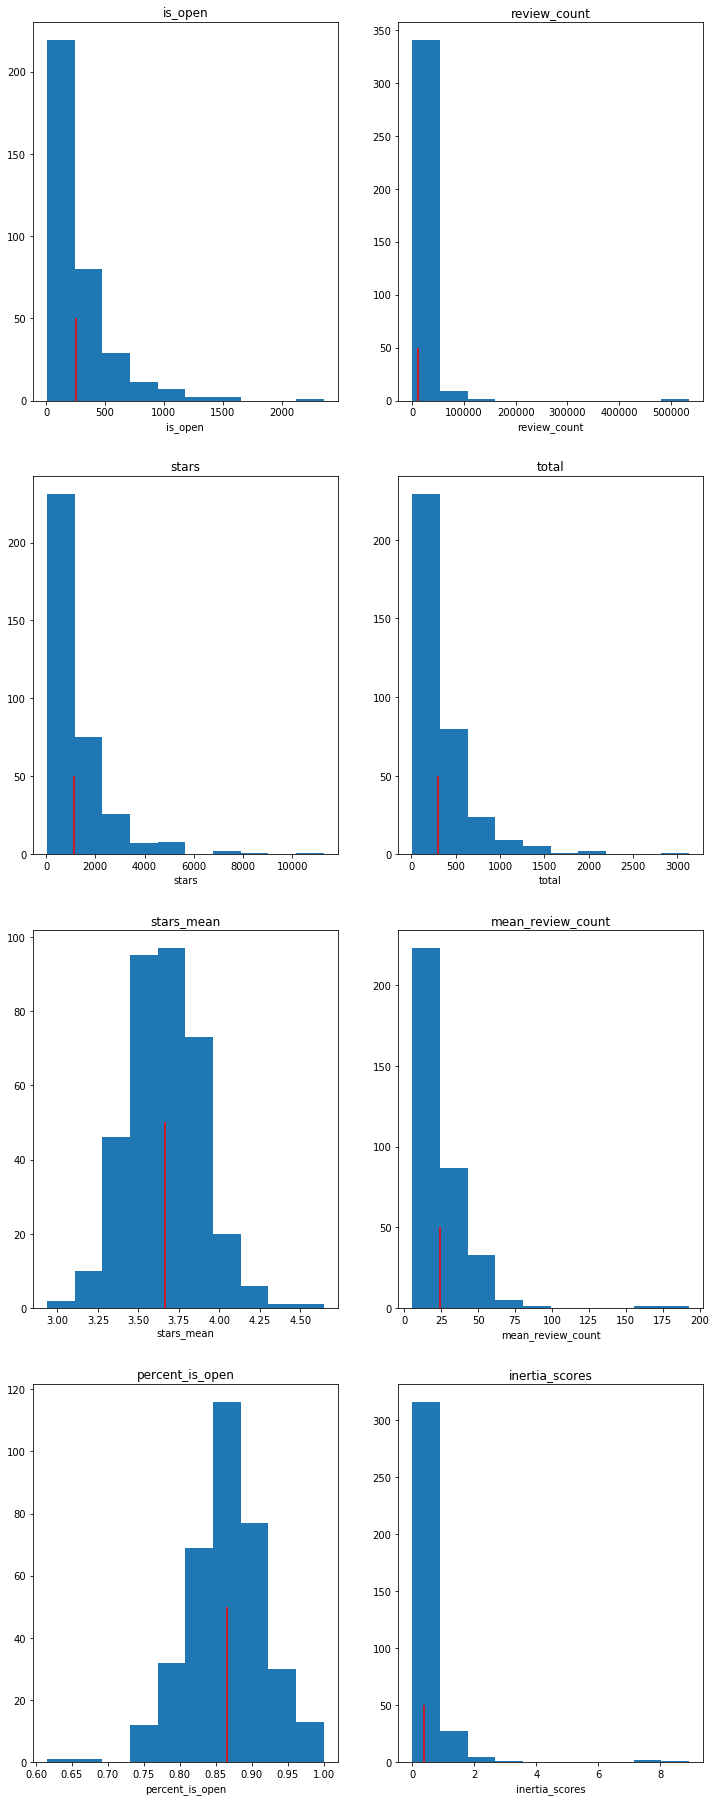

In [44]:
subplot_histograms(df[numeric_features],numeric_features,numeric_features,numeric_features )

Notes:
    
    -There is an outlier that might need to be addressed
    -Add a log version for the following features: is_open, review_count, stars, total, mean_review_count

In [45]:
df['review_count'].sort_values(ascending = False).head(10)

320    535634
257    117695
268     92718
328     71628
342     70412
323     67461
324     64019
343     59571
310     58028
264     57461
Name: review_count, dtype: int64

In [46]:
df[df['review_count']>400000]

,is_open,review_count,stars,3d,abatement,acai,accessories,accountants,acne,active,...,ziplining,zoos,total,price_per_sqft,state,price,stars_mean,mean_review_count,percent_is_open,inertia_scores
320,2357,535634,11285.5,0,0,0,173,2,1,100,...,0,1,3130,445,NV,340200,3.605591,171.129073,0.753035,1.324158


In [47]:
#removing an outlier, likely a data error
df = df[df['review_count']<400000]

In [48]:
# Creating new features with log transformation
df['is_open_log'] = np.log(df['is_open']).copy()
df['review_count_log'] = np.log(df['review_count']).copy()
df['stars_log'] = np.log(df['stars']).copy()
df['total_log'] = np.log(df['total']).copy()
df['mean_review_count_log'] = np.log(df['mean_review_count']).copy()
log_features = ['is_open_log','review_count_log','stars_log','total_log','mean_review_count_log']

In [49]:
#append new features to numeric features
numeric_features = numeric_features + log_features

#### Checking the scatterplot vs pricing to see if we need to do any additional features

In [50]:
df['price'].sort_values(ascending = False).head(10)

258    1530200
93      915100
265     873700
298     742400
266     695600
260     682700
263     633000
215     575800
262     507600
97      499000
Name: price, dtype: int64

In [51]:
# We are going to drop the extreme outlier in the data
df = df[df['price']<1_000_000]

In [52]:
df['price_per_sqft'].sort_values(ascending = False).head(10)

346    577
93     323
215    295
90     295
89     283
329    283
207    278
44     263
265    258
260    257
Name: price_per_sqft, dtype: int64

In [53]:
# Creating a function to create scatterplots of the numeric features vs price_per_sqft
def subplot_scatter(dataframe, variable, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))     # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (16, nrows * 6))    # You'll want to specify your figsize
    ax = ax.ravel()                                 # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns):    # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[column],variable, alpha = .3)               
        ax[i].set_title(list_of_titles[i])          # Set titles, labels, etc here for each subplot
        ax[i].set_ylabel('price_per_sqft')  
        ax[i].set_xlabel(list_of_xlabels[i])

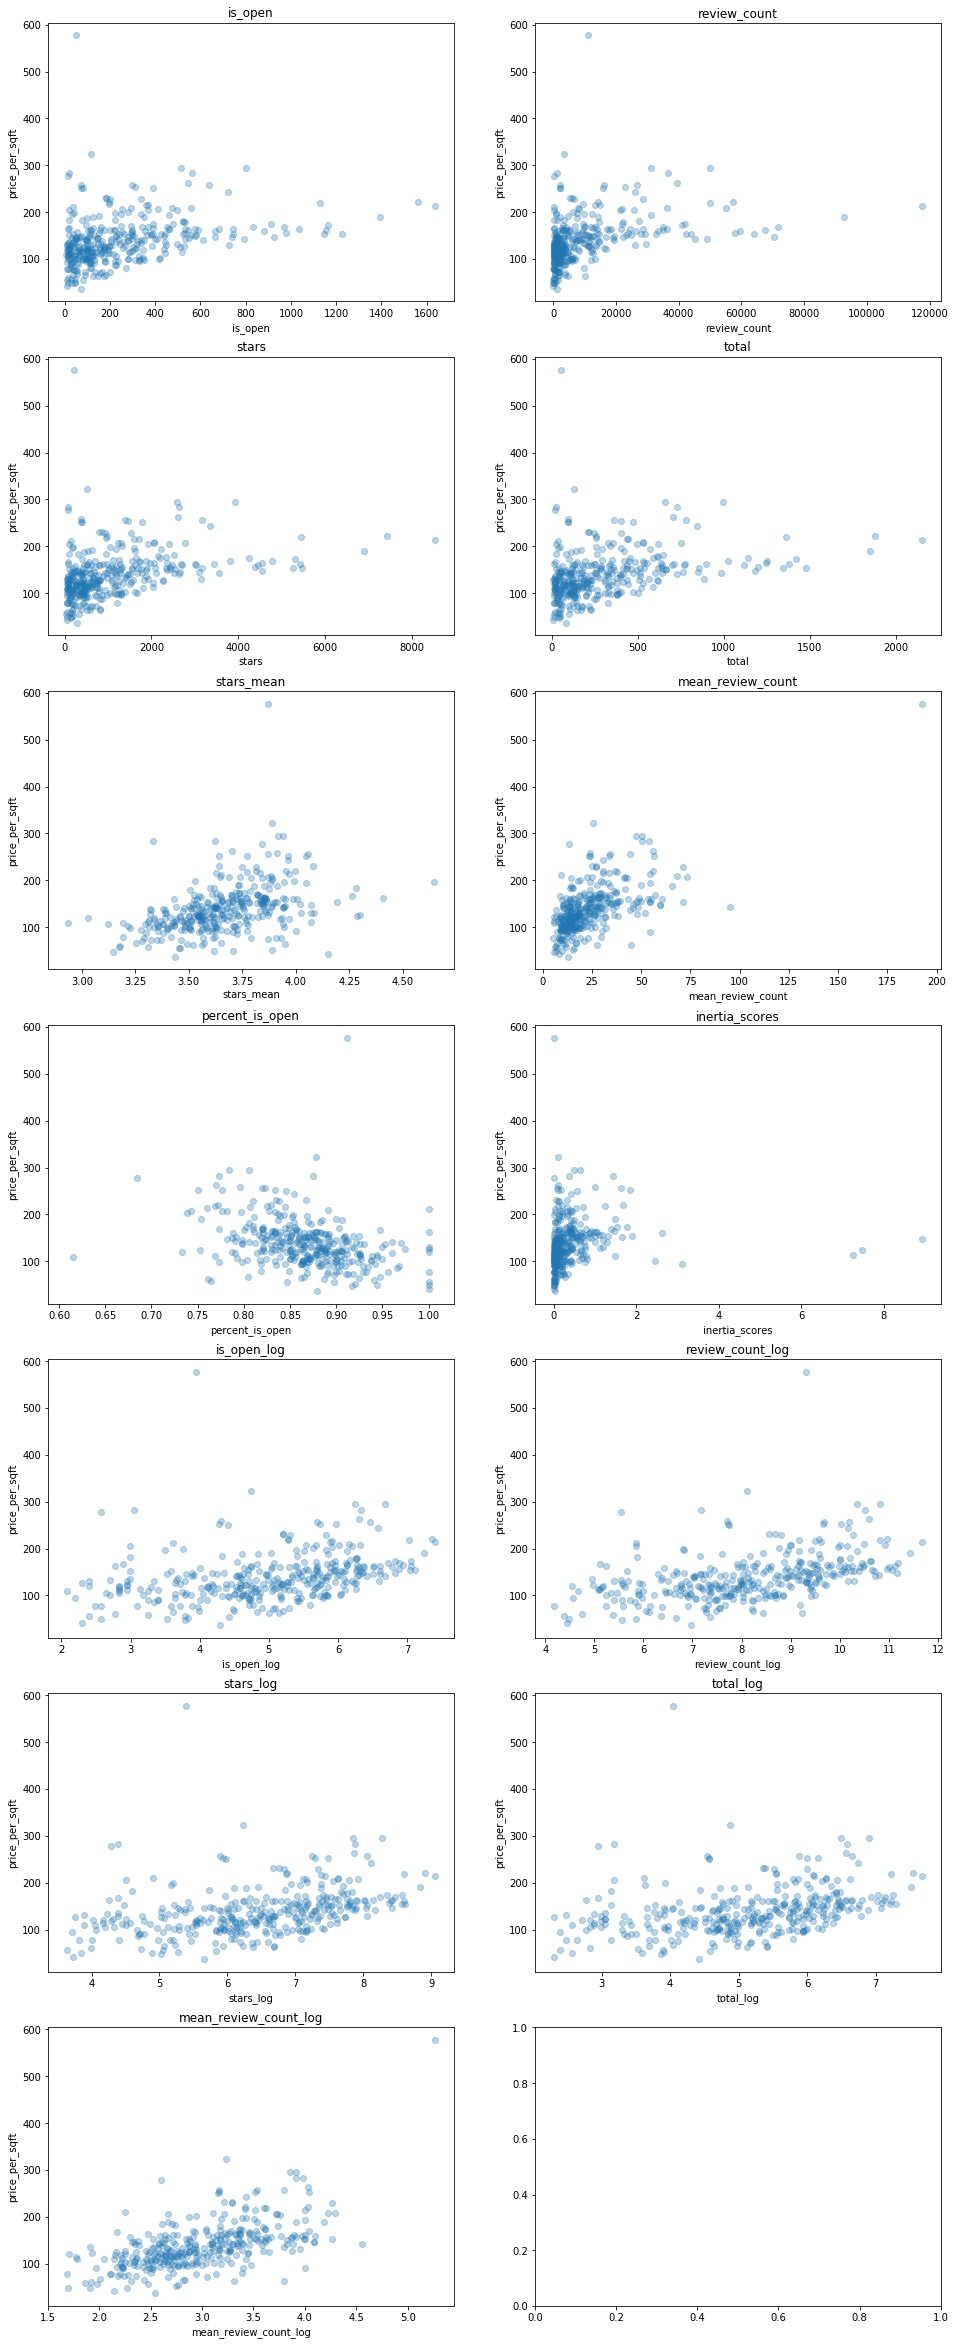

In [54]:
subplot_scatter(df[numeric_features], df['price_per_sqft'],numeric_features,numeric_features,numeric_features)

#### Creating new features with polynomial transformation

In [55]:
poly = PolynomialFeatures(include_bias=False)
df_poly = poly.fit_transform(df[numeric_features])
poly_col_names = poly.get_feature_names(numeric_features)
df_poly = pd.DataFrame(df_poly, columns = poly_col_names)
df_poly.head()

,is_open,review_count,stars,total,stars_mean,mean_review_count,percent_is_open,inertia_scores,is_open_log,review_count_log,...,review_count_log^2,review_count_log stars_log,review_count_log total_log,review_count_log mean_review_count_log,stars_log^2,stars_log total_log,stars_log mean_review_count_log,total_log^2,total_log mean_review_count_log,mean_review_count_log^2
0,37.0,456.0,158.0,40.0,3.950000,11.400000,0.925000,0.004366,3.610918,6.122493,...,37.484918,30.995702,22.585138,14.899780,25.629868,18.675303,12.320399,13.607832,8.977306,5.922474
1,158.0,3056.0,622.5,180.0,3.458333,16.977778,0.877778,0.053143,5.062595,8.024862,...,64.398413,51.629906,41.672763,22.725650,41.393057,33.410153,18.219753,26.966801,14.705962,8.019688
2,23.0,160.0,96.0,27.0,3.555556,5.925926,0.851852,0.015740,3.135494,5.075174,...,25.757389,23.164860,16.726945,9.030444,20.833274,15.043347,8.121513,10.862541,5.864404,3.166040
3,11.0,80.0,38.0,11.0,3.454545,7.272727,1.000000,0.000354,2.397895,4.382027,...,19.202157,15.939999,10.507641,8.694516,13.232033,8.722551,7.217449,5.749902,4.757739,3.936777
4,26.0,262.0,112.0,28.0,4.000000,9.357143,0.928571,0.025384,3.258097,5.568345,...,31.006461,26.274227,18.554863,12.451598,22.264232,15.723003,10.551224,11.103587,7.451276,5.000322


### Explore Categories Features 

In [56]:
word_vector = [i for i in df.columns if i not in ['is_open','review_count','stars','total','stars_mean','mean_review_count','percent_is_open','inertia_scores','num_clusters','is_open_log','review_count_log','stars_log','total_log','mean_review_count_log','state', 'price']]

In [57]:
word_df = df[word_vector]
top_businesses = word_df.sum().sort_values(ascending = False).head(50).index

In [58]:
# Checkign the correlation between business categories and price_per_sqft
pd.DataFrame(df[top_businesses].corr()['price_per_sqft'].sort_values(ascending=False).head(10)).rename({'price_per_sqft':'price_correlation'}, axis = 1)

,price_correlation
price_per_sqft,1.000000
active,0.385806
life,0.382453
arts,0.373031
fitness,0.370004
instruction,0.367328
estate,0.363708
real,0.362612
coffee,0.349412
professional,0.349228


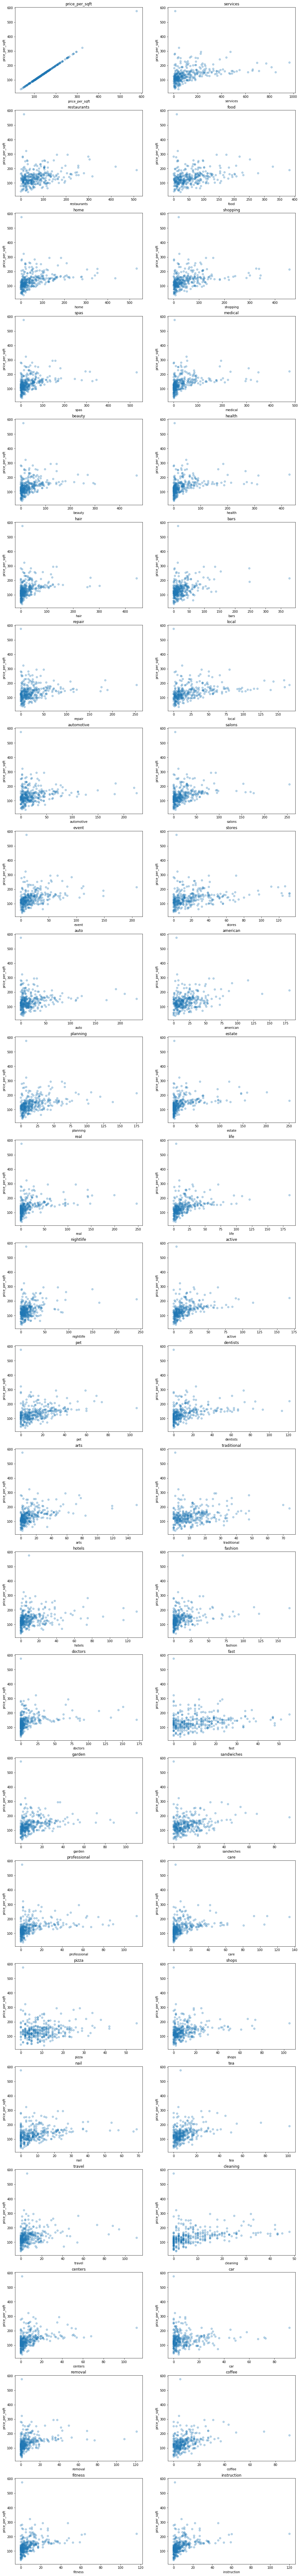

In [59]:
# Creating scratterplots of business categories vs price_per_sqft
subplot_scatter(df[top_businesses], df['price_per_sqft'],top_businesses,top_businesses,top_businesses)

### Explore State Features

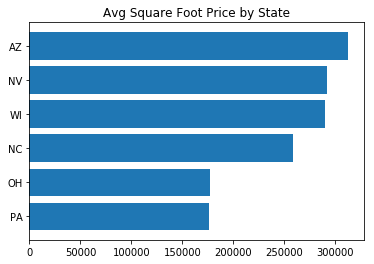

In [60]:
# Check the average price_per_sqft by state
plt.barh(df.groupby('state').mean()['price'].sort_values().index,df.groupby('state').mean()['price'].sort_values())
plt.title('Avg Square Foot Price by State')
plt.savefig('Images/Avg Price by State');

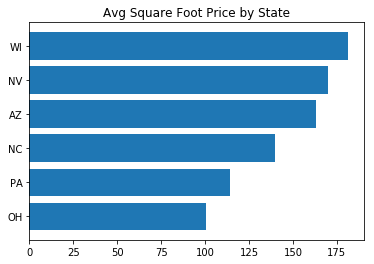

In [61]:
# Check the average price_per_sqft by state
plt.barh(df.groupby('state').mean()['price_per_sqft'].sort_values().index,df.groupby('state').mean()['price_per_sqft'].sort_values())
plt.title('Avg Square Foot Price by State')
plt.savefig('Images/Avg Square Foot Price by State');


In [62]:
# Create dummy variables for states since there is a strong pattern
df = pd.get_dummies(df, columns= ['state'], drop_first=True)

### Explore the Target Variable

In [63]:
df['price_per_sqft'].sort_values(ascending = False).head(10)

346    577
93     323
215    295
90     295
89     283
329    283
207    278
44     263
265    258
260    257
Name: price_per_sqft, dtype: int64

In [64]:
df = df[df['price_per_sqft']<500]

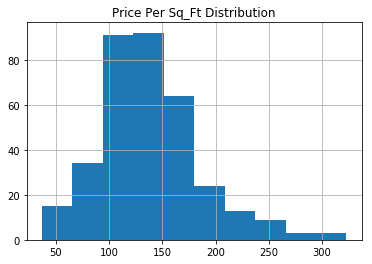

In [72]:
df['price_per_sqft'].hist()
plt.title('Price Per Sq_Ft Distribution')
plt.savefig('Images/Price Per Sq_Ft Distribution');

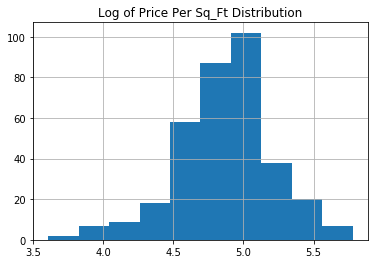

In [73]:
np.log(df['price_per_sqft']).hist()
plt.title('Log of Price Per Sq_Ft Distribution')
plt.savefig('Images/Log of Price Per Sq_Ft Distribution');

In [74]:
df['price'].sort_values(ascending = False).head(10)

93     915100
265    873700
298    742400
266    695600
260    682700
263    633000
215    575800
262    507600
97     499000
207    488000
Name: price, dtype: int64

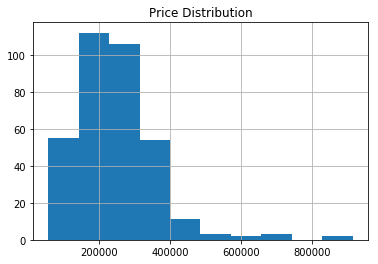

In [75]:
df['price'].hist()
plt.title('Price Distribution')
plt.savefig('Images/Price Distribution');

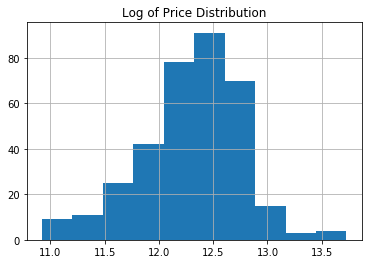

In [76]:
np.log(df['price']).hist()
plt.title('Log of Price Distribution')
plt.savefig('Images/Log of Price Distribution');

In [77]:
# In both cases, price and price_per_sqft, log transformation would normalize the y variable
df['price_per_sqft_log'] = np.log(df['price_per_sqft'])
df['price_log'] = np.log(df['price'])

##### Export the file

In [78]:
df.to_csv('Data/final_data.csv', index = False)